#### 라이브러리 불러오기

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# 모든 행과 열을 확인하고 싶으면 다음의 주석을 해제하면 됩니다.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#### 데이터 불러오기

In [52]:
# 데이터 경로 지정
path_month_4 = "/Users/zaewoo/Downloads/서울시교통관련데이터/차량통행속도/04월 서울시 교통량 조사자료(2022).xlsx"
path_month_5 = "/Users/zaewoo/Downloads/서울시교통관련데이터/차량통행속도/05월 서울시 교통량 조사자료(2022).xlsx"

# 데이터 불러오기
df_month_4 = pd.read_excel(path_month_4, sheet_name="2022년 04월")
df_month_5 = pd.read_excel(path_month_5, sheet_name="2022년 05월")

#### 데이터 전처리

In [53]:
# 탐색 구간 지정

# 4월
df_month_4 = df_month_4.loc[((df_month_4["지점명"]=="한강대교") | 
                            (df_month_4["지점명"]=="동작대교") | 
                            (df_month_4["지점명"]=="반포대교") | 
                            (df_month_4["지점명"]=="한남대교") | 
                            (df_month_4["지점명"]=="잠수교")) &
                            (df_month_4["방향"]=="유입")]

# 5월
df_month_5 = df_month_5.loc[((df_month_5["지점명"]=="한강대교") | 
                            (df_month_5["지점명"]=="동작대교") | 
                            (df_month_5["지점명"]=="반포대교") | 
                            (df_month_5["지점명"]=="한남대교") | 
                            (df_month_5["지점명"]=="잠수교")) &
                            (df_month_5["방향"]=="유입")]

In [54]:
# 탐색 일자 지정
df_month_4 = df_month_4.loc[(df_month_4["일자"] > 20220419)]
df_month_5 = df_month_5.loc[(df_month_5["일자"] < 20220531)]

# 탐색 일자 내 공휴일 제거
df_month_5 = df_month_5[df_month_5["일자"] != 20220505] 

In [55]:
# 탐색 요일 지정
df_month_4 = df_month_4.loc[(df_month_4["요일"] != "토") & (df_month_4["요일"] != "일")]
df_month_5 = df_month_5.loc[(df_month_5["요일"] != "토") & (df_month_5["요일"] != "일")]

data = pd.concat([df_month_4, df_month_5])

In [56]:
# 탐색 일자 구분: 대통령 취임 전과 후로 구분하였습니다.
df_month_5_before = df_month_5.loc[(df_month_5["일자"] < 20220511)]
df_month_5_after = df_month_5.loc[(df_month_5["일자"] > 20220510)]

In [57]:
# 데이터 병합
df_month_4 = pd.concat([df_month_4, df_month_5_before])
df_month_5 = df_month_5_after

In [58]:
# 탐색 구간 별 분석을 위하여 다음과 같이 분류하였습니다.

# 한강대교
hangang_month_4 = df_month_4[df_month_4["지점명"] == "한강대교"]
hangang_month_5 = df_month_5[df_month_5["지점명"] == "한강대교"]
hangang = pd.concat([hangang_month_4, hangang_month_5])

# 한강대교 - 탐색 시간 지정
hangang_month_4 = hangang_month_4[["8시", "9시", "10시"]]
hangang_month_5 = hangang_month_5[["8시", "9시", "10시"]]
hangang = hangang[["8시", "9시", "10시"]]

# 한강대교 - 결측치: 기준 컬럼의 평균을 결측치에 대입하였습니다.
hangang_month_4.fillna(hangang_month_4.mean())
hangang_month_5.fillna(hangang_month_5.mean())
hangang.fillna(hangang.mean())

# 동작대교
dongjak_month_4 = df_month_4[df_month_4["지점명"] == "동작대교"]
dongjak_month_5 = df_month_5[df_month_5["지점명"] == "동작대교"]
dongjak = pd.concat([dongjak_month_4, dongjak_month_5])

# 동작대교 - 탐색 시간 지정
dongjak_month_4 = dongjak_month_4[["8시", "9시", "10시"]]
dongjak_month_5 = dongjak_month_5[["8시", "9시", "10시"]]
dongjak = dongjak[["8시", "9시", "10시"]]

# 동작대교 - 결측치: 기준 컬럼의 평균을 결측치에 대입하였습니다.
dongjak_month_4.fillna(dongjak_month_4.mean())
dongjak_month_5.fillna(dongjak_month_5.mean())
dongjak.fillna(dongjak.mean())

# 반포대교
banpo_month_4 = df_month_4[df_month_4["지점명"] == "반포대교"]
banpo_month_5 = df_month_5[df_month_5["지점명"] == "반포대교"]
banpo = pd.concat([banpo_month_4, banpo_month_5])

# 반포대교 - 탐색 시간 지정
banpo_month_4 = banpo_month_4[["8시", "9시", "10시"]]
banpo_month_5 = banpo_month_5[["8시", "9시", "10시"]]
banpo = banpo[["8시", "9시", "10시"]]

# 한남대교
hannam_month_4 = df_month_4[df_month_4["지점명"] == "한남대교"]
hannam_month_5 = df_month_5[df_month_5["지점명"] == "한남대교"]
hannam = pd.concat([hannam_month_4, hannam_month_5])

# 한남대교 - 탐색 시간 지정
hannam_month_4 = hannam_month_4[["8시", "9시", "10시"]]
hannam_month_5 = hannam_month_5[["8시", "9시", "10시"]]
hannam = hannam[["8시", "9시", "10시"]]

# 잠수교
jamsu_month_4 = df_month_4[df_month_4["지점명"] == "잠수교"]
jamsu_month_5 = df_month_5[df_month_5["지점명"] == "잠수교"]
jamsu = pd.concat([jamsu_month_4, jamsu_month_5])

# 잠수교 - 탐색 시간 지정
jamsu_month_4 = jamsu_month_4[["8시", "9시", "10시"]]
jamsu_month_5 = jamsu_month_5[["8시", "9시", "10시"]]
jamsu = hangang[["8시", "9시", "10시"]]

In [59]:
# 탐색 시간 지정
data = data[["8시", "9시", "10시"]]
df_month_4 = df_month_4[["8시", "9시", "10시"]]
df_month_5 = df_month_5[["8시", "9시", "10시"]]

#### 결과 확인

In [60]:
# 전체 데이터의 결과 수치 확인
print(data.mean())
print(df_month_4.mean())
print(df_month_5.mean())

8시     3010.046154
9시     2660.376923
10시    2507.400000
dtype: float64
8시     3041.970588
9시     2671.132353
10시    2522.661765
dtype: float64
8시     2975.032258
9시     2648.580645
10시    2490.661290
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


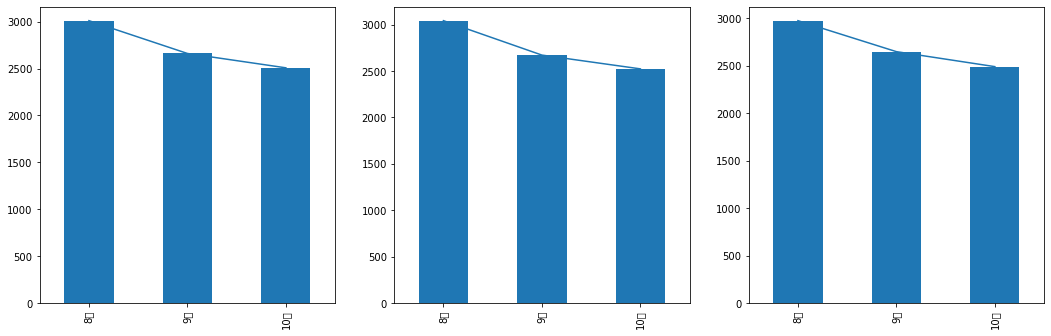

In [61]:
# 전체 데이터의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(data.mean())
print(data.mean().plot.bar())
plt.subplot(232)
plt.plot(df_month_4.mean())
print(df_month_4.mean().plot.bar())
plt.subplot(233)
plt.plot(df_month_5.mean())
print(df_month_5.mean().plot.bar())

In [62]:
# 한강대교의 결과 수치 확인
print(hangang_month_4.mean())
print(hangang_month_5.mean())
print(hangang.mean())

8시     3206.571429
9시     2988.428571
10시    2901.500000
dtype: float64
8시     2959.000000
9시     2972.333333
10시    2832.333333
dtype: float64
8시     3132.30
9시     2983.60
10시    2880.75
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


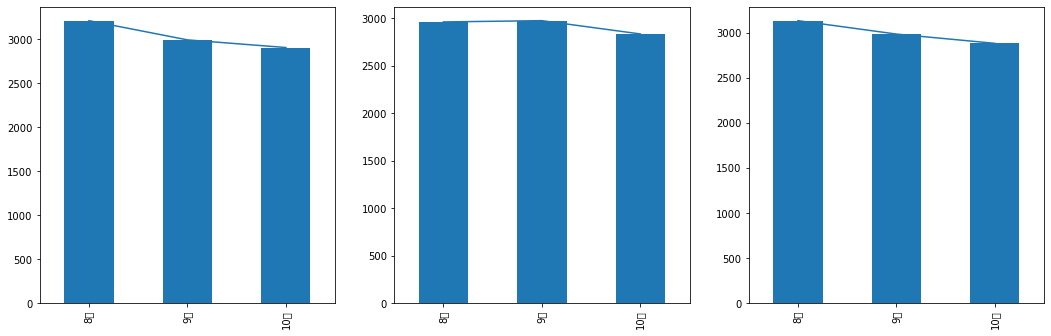

In [63]:
# 한강대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(hangang_month_4.mean())
print(hangang_month_4.mean().plot.bar())
plt.subplot(232)
plt.plot(hangang_month_5.mean())
print(hangang_month_5.mean().plot.bar())
plt.subplot(233)
plt.plot(hangang.mean())
print(hangang.mean().plot.bar())

In [64]:
# 동작대교의 결과 수치 확인
print(dongjak_month_4.mean())
print(dongjak_month_5.mean())
print(dongjak.mean())

8시     2207.000000
9시     1643.000000
10시    1503.416667
dtype: float64
8시     2263.714286
9시     1703.500000
10시    1515.214286
dtype: float64
8시     2237.538462
9시     1675.576923
10시    1509.769231
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


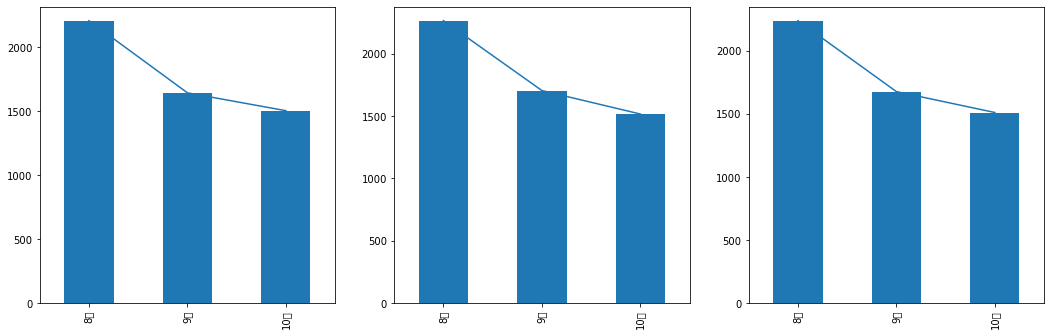

In [65]:
# 동작대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(dongjak_month_4.mean())
print(dongjak_month_4.mean().plot.bar())
plt.subplot(232)
plt.plot(dongjak_month_5.mean())
print(dongjak_month_5.mean().plot.bar())
plt.subplot(233)
plt.plot(dongjak.mean())
print(dongjak.mean().plot.bar())

In [66]:
# 반포대교의 결과 수치 확인
print(banpo_month_4.mean())
print(banpo_month_5.mean())
print(banpo.mean())

8시     3605.142857
9시     3202.714286
10시    2930.928571
dtype: float64
8시     3608.714286
9시     3187.500000
10시    2946.500000
dtype: float64
8시     3606.928571
9시     3195.107143
10시    2938.714286
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


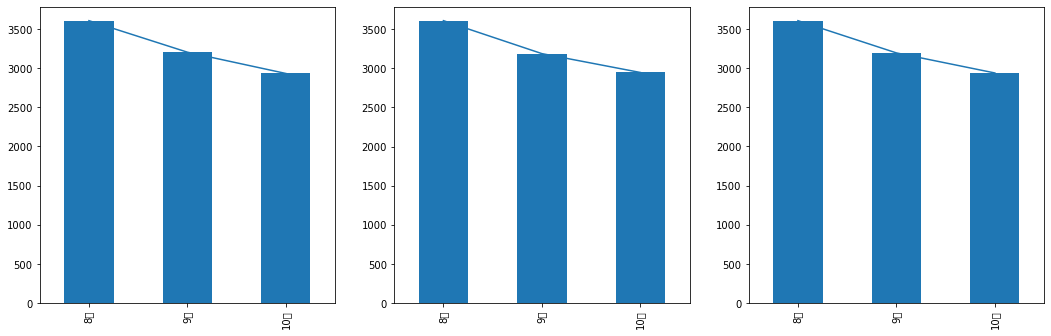

In [67]:
# 반포대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(banpo_month_4.mean())
print(banpo_month_4.mean().plot.bar())
plt.subplot(232)
plt.plot(banpo_month_5.mean())
print(banpo_month_5.mean().plot.bar())
plt.subplot(233)
plt.plot(banpo.mean())
print(banpo.mean().plot.bar())

In [68]:
# 한남대교의 결과 확인
print(hannam_month_4.mean())
print(hannam_month_5.mean())
print(hannam.mean())

8시     5559.642857
9시     4956.214286
10시    4687.357143
dtype: float64
8시     5512.500000
9시     5105.785714
10시    4860.714286
dtype: float64
8시     5536.071429
9시     5031.000000
10시    4774.035714
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


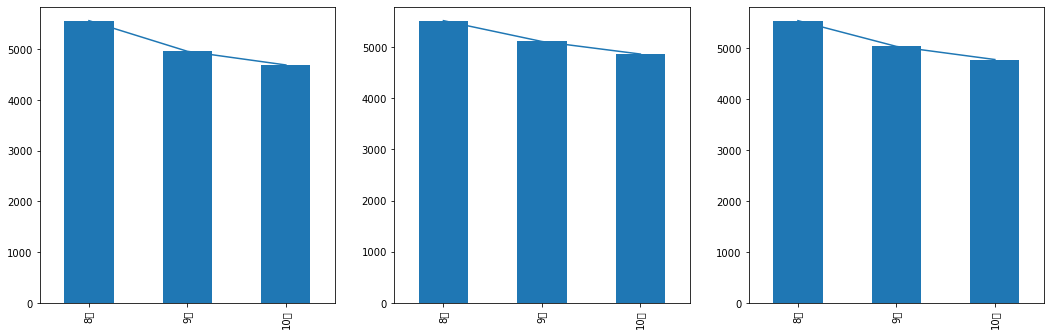

In [69]:
# 한남대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(hannam_month_4.mean())
print(hannam_month_4.mean().plot.bar())
plt.subplot(232)
plt.plot(hannam_month_5.mean())
print(hannam_month_5.mean().plot.bar())
plt.subplot(233)
plt.plot(hannam.mean())
print(hannam.mean().plot.bar())

In [70]:
# 잠수교의 결과 확인
print(jamsu_month_4.mean())
print(jamsu_month_5.mean())
print(jamsu.mean())

8시     512.214286
9시     418.428571
10시    444.500000
dtype: float64
8시     522.071429
9시     458.785714
10시    493.785714
dtype: float64
8시     3132.30
9시     2983.60
10시    2880.75
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


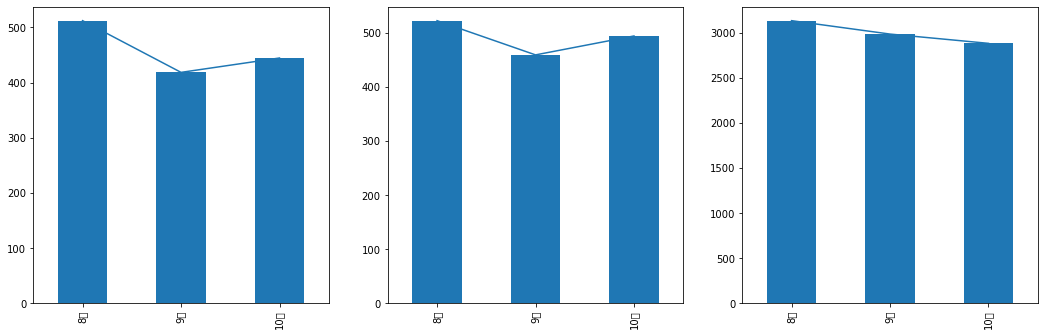

In [71]:
# 잠수교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(jamsu_month_4.mean())
print(jamsu_month_4.mean().plot.bar())
plt.subplot(232)
plt.plot(jamsu_month_5.mean())
print(jamsu_month_5.mean().plot.bar())
plt.subplot(233)
plt.plot(jamsu.mean())
print(jamsu.mean().plot.bar())